In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [96]:
df=pd.read_csv(r"C:\Users\Baskar\OneDrive\Desktop\Exploratory data analysis\DS1_C5_S5_Hotel Dataset.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015


In [11]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [13]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

# Task-1: Data Cleaning:

In [9]:
# Step 1: Handle Missing Values
# Fill missing values in 'agent' and 'company' columns with a placeholder (e.g., 0)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

# Step 2: Correct Data Types
# Convert 'reservation_status_date' to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d-%m-%Y')

# Step 3: Remove or Replace Outliers
# For now, we'll check for obvious outliers in the 'adr' (Average Daily Rate) column
# Replace negative or extremely high values with the median value
median_adr = df['adr'].median()
df['adr'] = df['adr'].apply(lambda x: median_adr if x < 0 or x > median_adr * 5 else x)

# Step 4: Handle Duplicate Rows
# Drop duplicate rows, if any
df.drop_duplicates(inplace=True)

# Step 5: Standardize Text Data
# Standardize the 'meal' column (e.g., replace variations like 'BB' with 'Bed & Breakfast')
df['meal'] = df['meal'].replace({'BB': 'Bed & Breakfast', 'FB': 'Full Board', 'HB': 'Half Board', 'SC': 'Self Catering', 'Undefined': 'No Meal'})

# Display the cleaned dataset's information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1875 entries, 0 to 2096
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           1875 non-null   object        
 1   is_canceled                     1875 non-null   int64         
 2   lead_time                       1875 non-null   int64         
 3   arrival_date_year               1875 non-null   int64         
 4   arrival_date_month              1875 non-null   object        
 5   arrival_date_week_number        1875 non-null   int64         
 6   arrival_date_day_of_month       1875 non-null   int64         
 7   stays_in_weekend_nights         1875 non-null   int64         
 8   stays_in_week_nights            1875 non-null   int64         
 9   adults                          1875 non-null   int64         
 10  children                        1875 non-null   int64         
 11  babies   

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,0.0,0,Transient,97.00,0,3,Check-Out,2015-07-05
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-04
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,0.0,0,Transient,153.00,1,0,Check-Out,2015-07-05
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,0.0,0,Transient,94.71,0,0,Check-Out,2015-07-04
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,0.0,0,Transient,117.81,1,2,Check-Out,2015-07-10


# Interpretation:
In this task I done a data preprocessing by filling the missing values in the columns agent and company with
value =0,converted reservation datatype into datetime,additionally replaced negative or extremely high values with the median value and Standardized Text.                


# Task-2: Booking pattern analysis:

# Task-2(I) What is the peak booking period for the hotel:

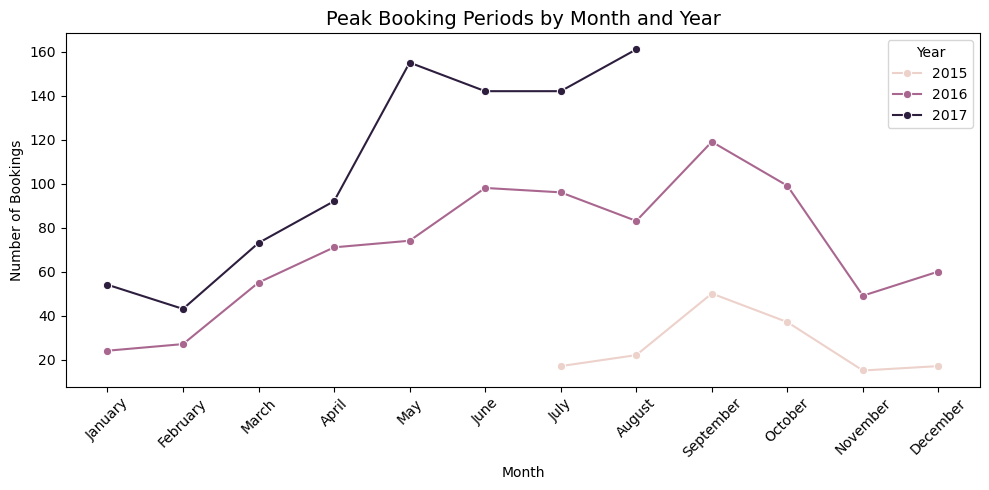

In [15]:
# Group the data by month and year to find the peak booking periods
booking_counts = df.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='booking_count')

# Sort the months properly for better visualization
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
booking_counts['arrival_date_month'] = pd.Categorical(booking_counts['arrival_date_month'], categories=month_order, ordered=True)
booking_counts = booking_counts.sort_values(['arrival_date_year', 'arrival_date_month'])

# Plot the booking trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=booking_counts, x='arrival_date_month', y='booking_count', hue='arrival_date_year', marker='o')
plt.title('Peak Booking Periods by Month and Year', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

# Interpretation:
In this task first I analysed the booking columns like arrival_date_year and arrival_date_month to find peak booking periods.
Furthermore sorted the month to visualize and then I used advanced lineplot for visualization.Peak booking period at the year of 2015 was in the month of September, 
at the year of 2016 peak booking period was in the month of September and finally at the year of 2017 peak booking period was in the month of May.

# Task-2(II): Is there relationship between leadtime and the likelihood of the booking being cancelled?

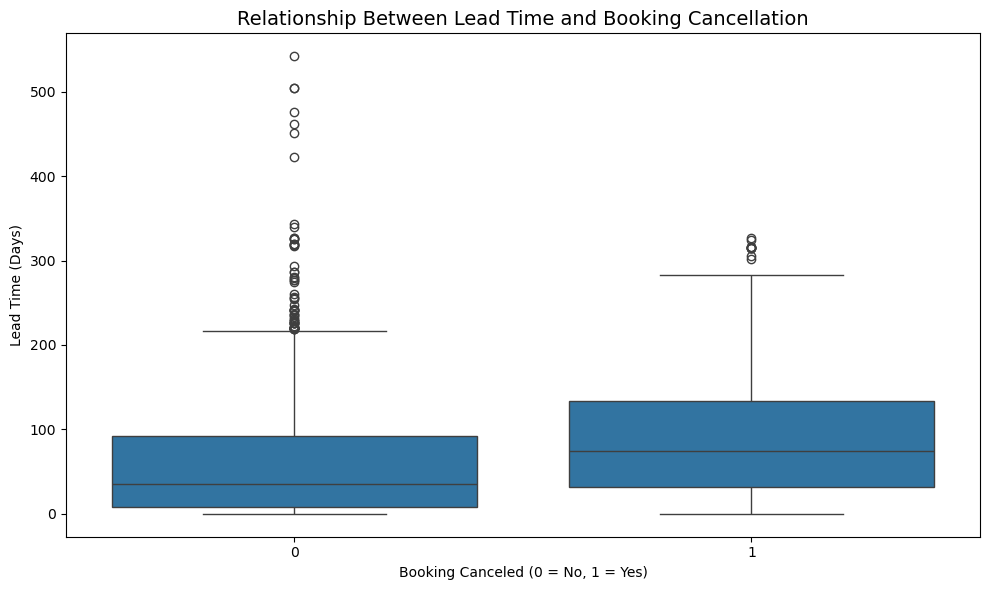

Correlation between Lead Time and Cancellation: 0.17


In [17]:
# Plotting the relationship between lead time and cancellation rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title('Relationship Between Lead Time and Booking Cancellation', fontsize=14)
plt.xlabel('Booking Canceled (0 = No, 1 = Yes)')
plt.ylabel('Lead Time (Days)')
plt.tight_layout()
plt.show()

# Calculate the correlation between lead time and booking cancellation
correlation = df['lead_time'].corr(df['is_canceled'])
print(f"Correlation between Lead Time and Cancellation: {correlation:.2f}")

# Interpretation:
In this task to find the relationship between leadtime and likelihood first I has used both columns and then I has used
corr function to find the relationship and visualized using boxplot.

# Task-2(III): How do booking patterns vary by month,week and day of week?

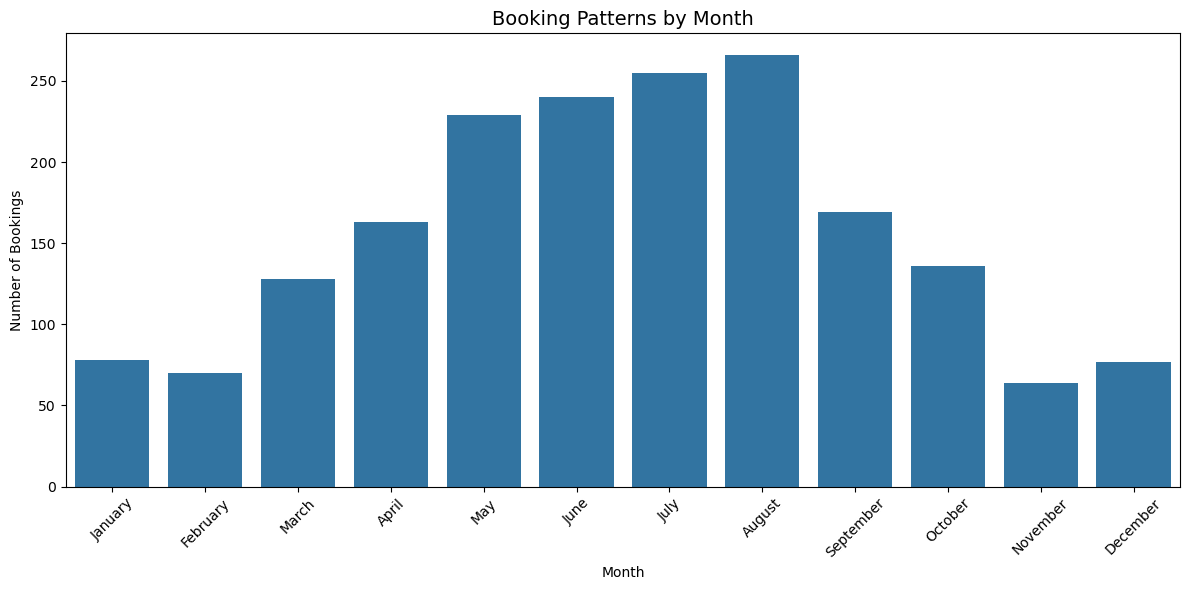

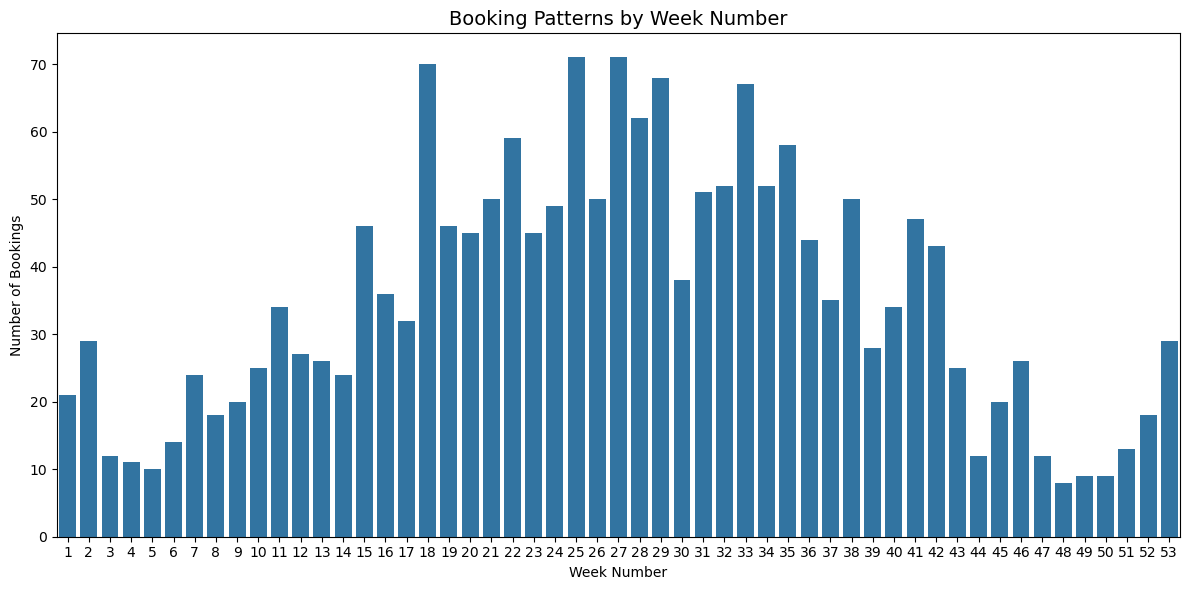

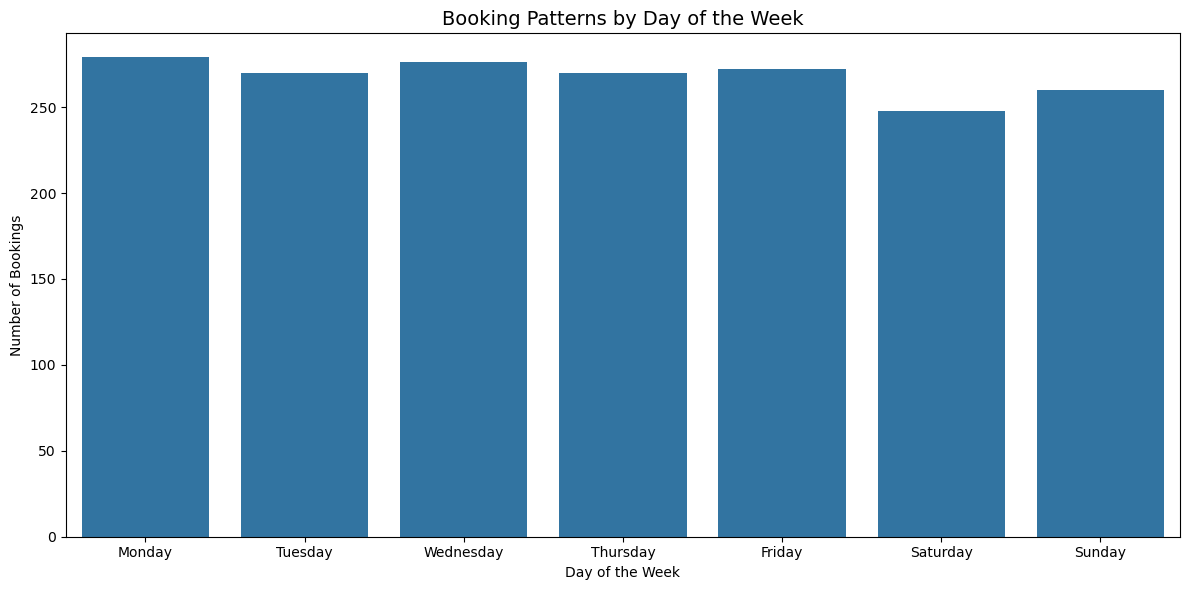

In [19]:
# Create a new column for the day of the week
df['day_of_week'] = df['reservation_status_date'].dt.day_name()

# Plotting booking patterns by month
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='arrival_date_month', order=['January', 'February', 'March', 'April', 'May', 'June', 
                                                     'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Booking Patterns by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting booking patterns by week number
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='arrival_date_week_number')
plt.title('Booking Patterns by Week Number', fontsize=14)
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

# Plotting booking patterns by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Booking Patterns by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

# Interpretation:
Here, I was used countplot to visualize the booking pattern vary by day,month and week.In monthly August is peak,in day Monday is peak
and in week 25th week is in peak for booking.

# Task-3:Booking Cancellation analysis:

# Task-3(I): What factors influence booking cancellation?

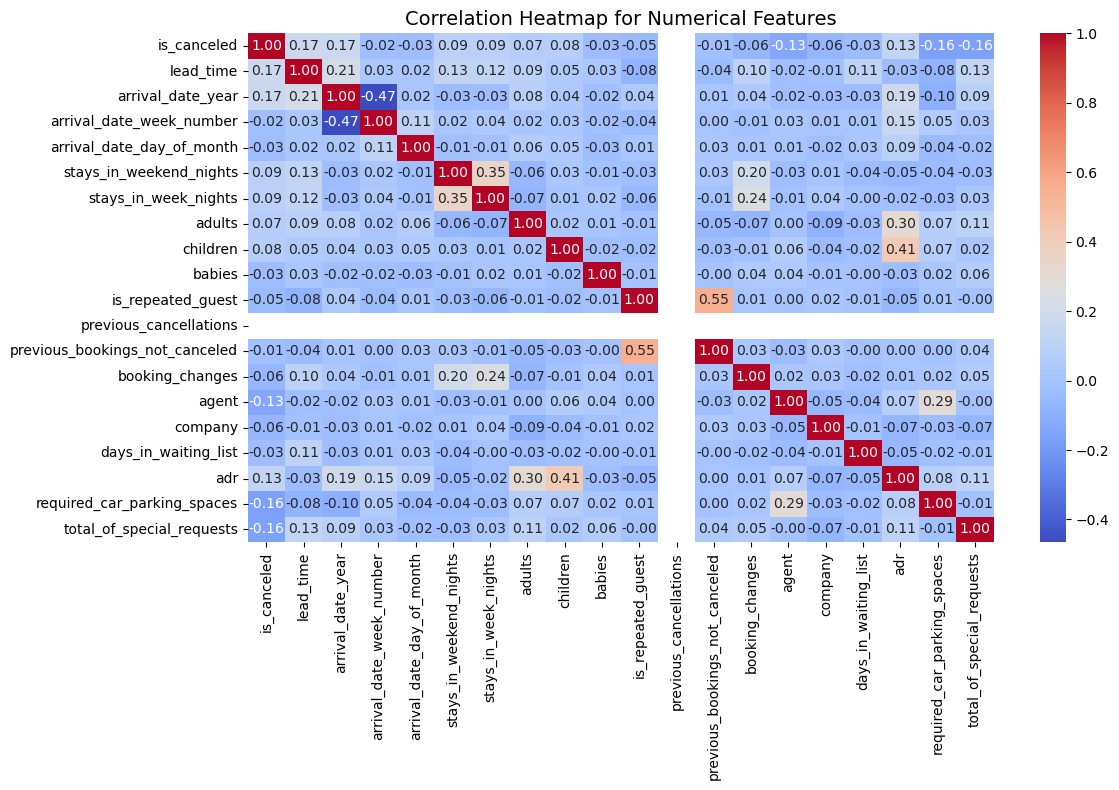

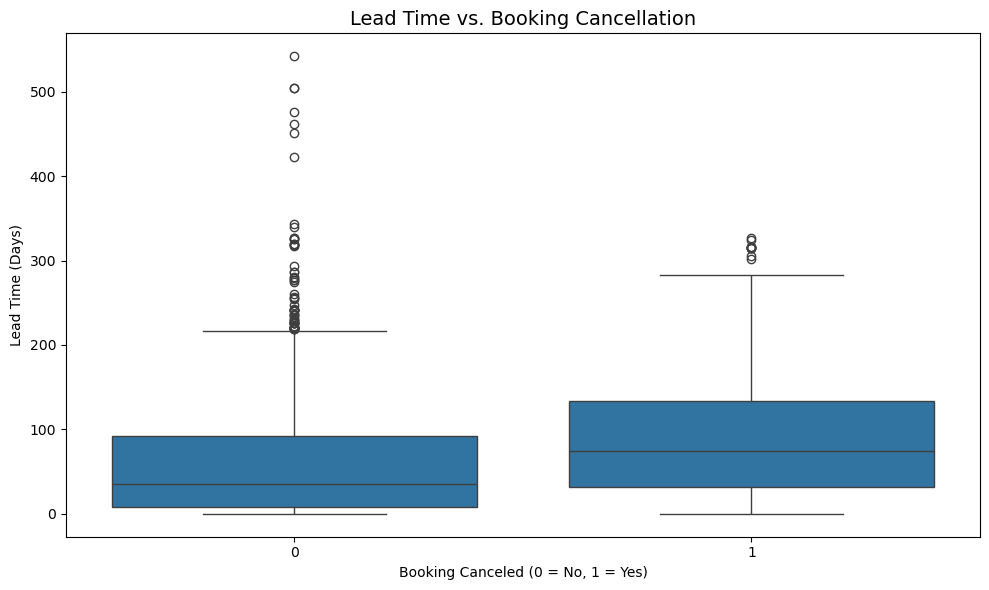

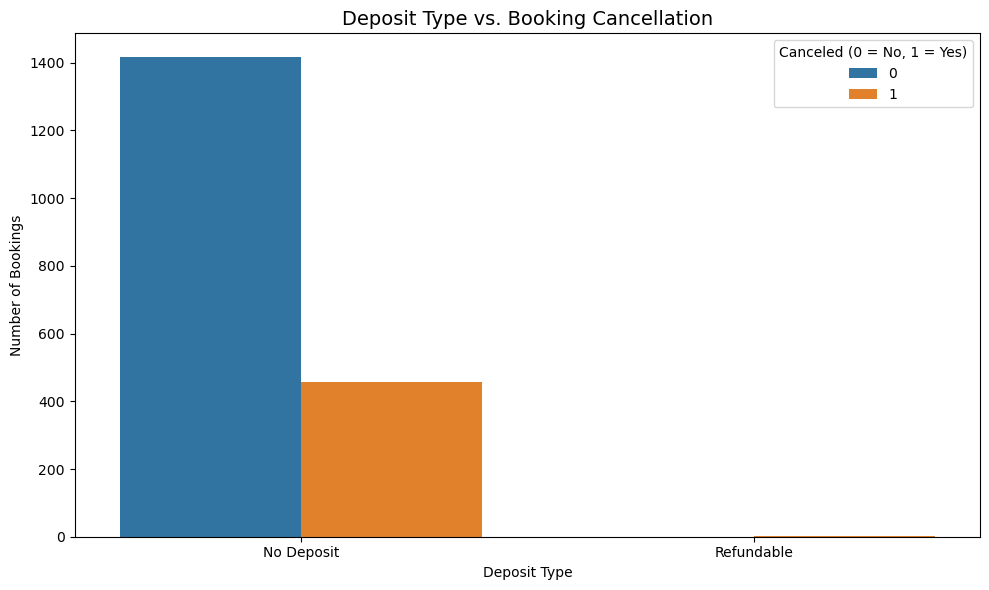

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only numerical columns for the correlation heatmap
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap to see the relationship between 'is_canceled' and other numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

# Analyze specific factors like lead time and deposit type with cancellation rates
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title('Lead Time vs. Booking Cancellation', fontsize=14)
plt.xlabel('Booking Canceled (0 = No, 1 = Yes)')
plt.ylabel('Lead Time (Days)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='deposit_type', hue='is_canceled')
plt.title('Deposit Type vs. Booking Cancellation', fontsize=14)
plt.xlabel('Deposit Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Canceled (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

# Interpretation:
In this task using heatmap it shows positive relationship with booking calcellation.
Using boxplot longer lead times are associated with a higher likelihood of cancellations.
using countplot most cancellations occur with bookings that have no deposit.

# Task-3(II):Are there specific trends or patterns in cancellation over time?

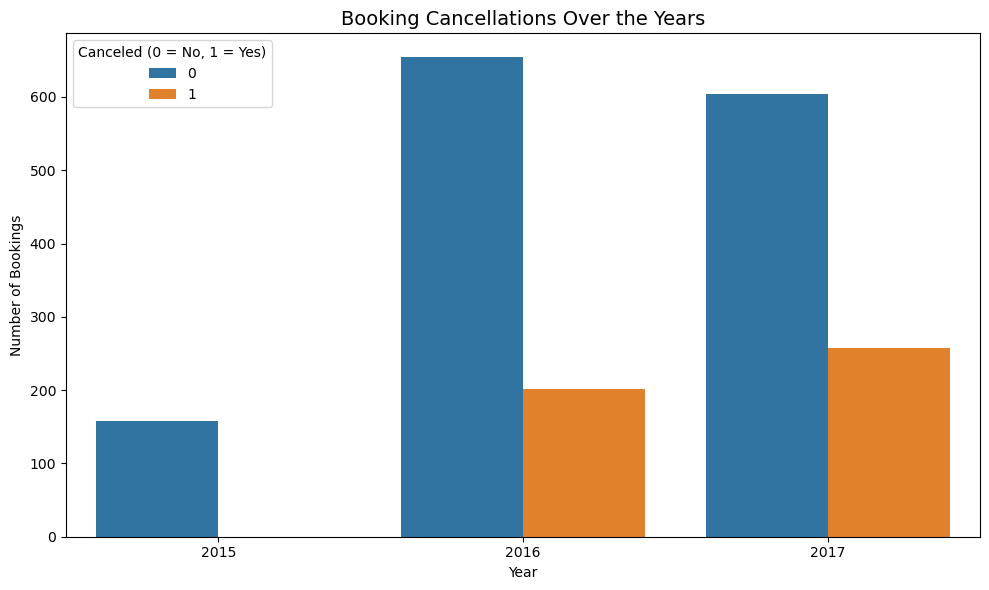

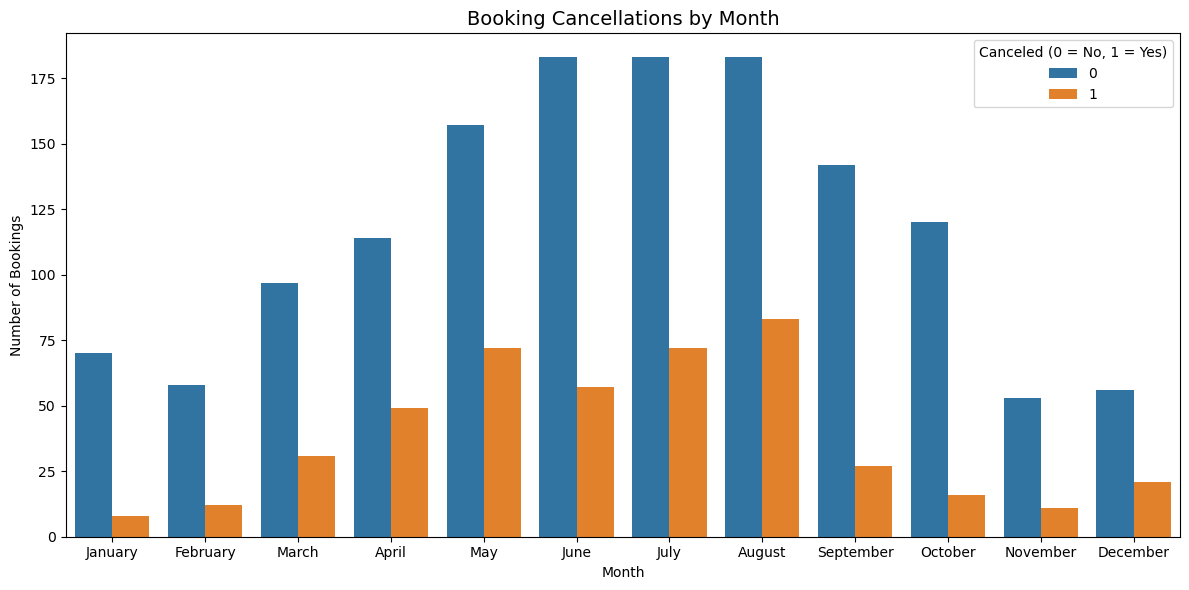

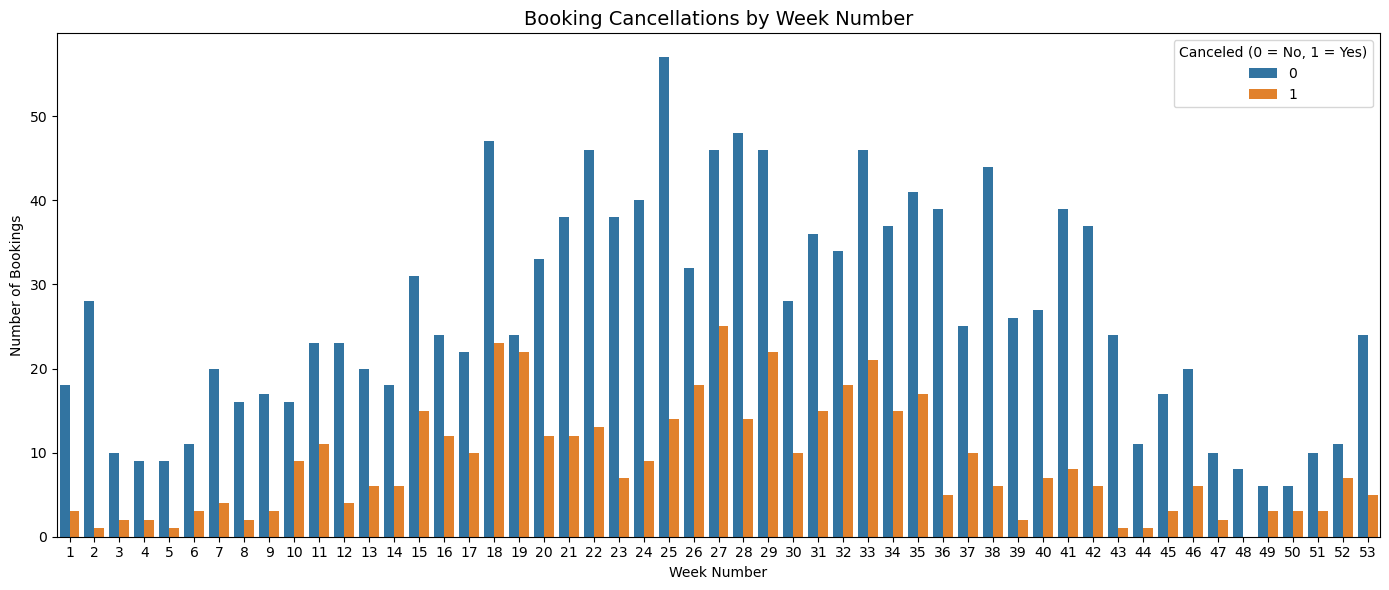

In [23]:
# Plotting cancellation trends over the years
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='arrival_date_year', hue='is_canceled')
plt.title('Booking Cancellations Over the Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.legend(title='Canceled (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

# Plotting cancellation trends by month
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='arrival_date_month', hue='is_canceled', order=['January', 'February', 'March', 'April', 'May', 'June', 
                                                                        'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Booking Cancellations by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(title='Canceled (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

# Plotting cancellation trends by week number
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='arrival_date_week_number', hue='is_canceled')
plt.title('Booking Cancellations by Week Number', fontsize=14)
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')
plt.legend(title='Canceled (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

# Interpretation:
In this task to find specific trends using countplot I has identified that the year 2016 is in peak.
Using countplot by specfic trend in month August is in peak.Using week 25th week is in peak.

# Task-3(III):Can you identify high-risk bookings that are more likely to be cancelled?

Accuracy: 0.7442273534635879
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       423
           1       0.25      0.01      0.03       140

    accuracy                           0.74       563
   macro avg       0.50      0.50      0.44       563
weighted avg       0.63      0.74      0.65       563



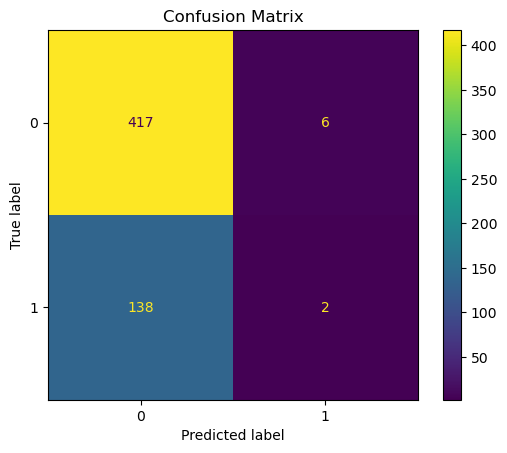

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Selecting relevant features for the model
features = ['lead_time', 'previous_cancellations', 'deposit_type']
df['deposit_type'] = df['deposit_type'].astype('category').cat.codes  # Convert categorical to numerical codes

X = df[features]
y = df['is_canceled']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualization:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Interpretation:
In this task,if the model predicts a high likelihood of cancellation based on long lead times, no deposit, and previous cancellations,
these can be considered high-risk.

# Task-4:Customer Behavioral Segmentation:

# Task-4(I):Are there distinct pattern in the leadtime ,special request or room preferences for different customer segments?

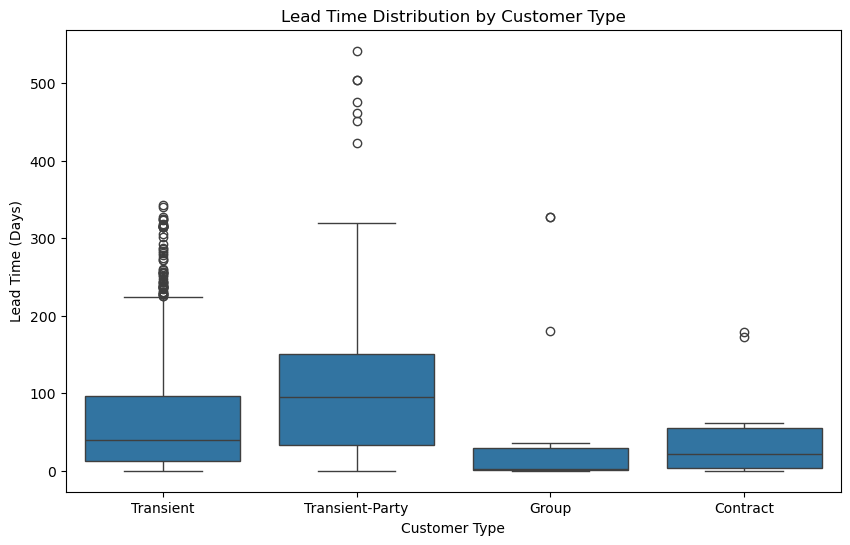

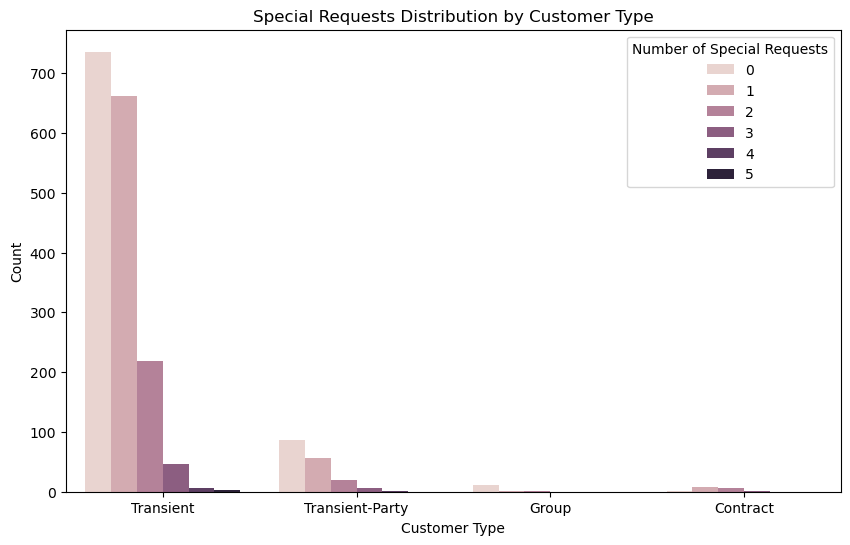

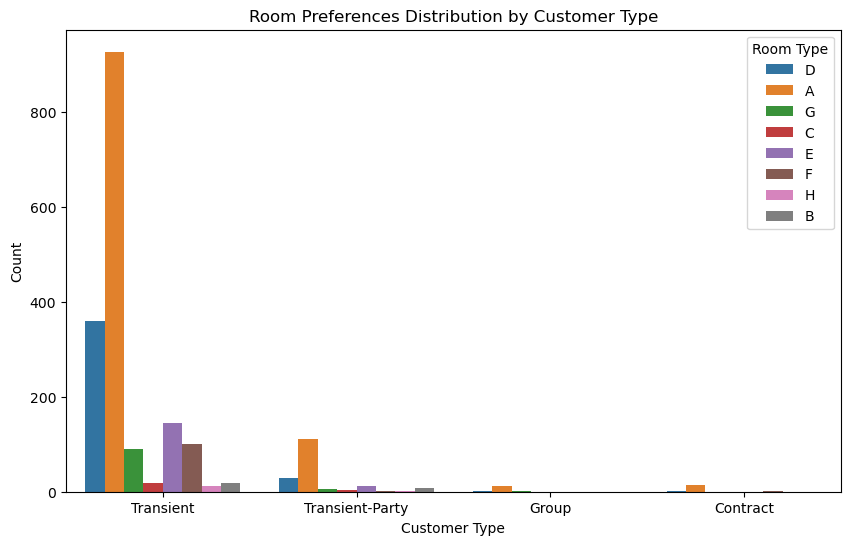

In [26]:
# Group data by customer type and calculate statistics
grouped_data = df.groupby('customer_type')[['lead_time', 'total_of_special_requests']].describe()

# Visualize lead time distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_type', y='lead_time', data=df)
plt.title('Lead Time Distribution by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Lead Time (Days)')
plt.show()

# Visualize special requests distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', hue='total_of_special_requests', data=df)
plt.title('Special Requests Distribution by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Number of Special Requests')
plt.show()

# Visualize room preferences distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', hue='reserved_room_type', data=df)
plt.title('Room Preferences Distribution by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Room Type')
plt.show()

# Interpretation:
In this task using boxplot for leadtime I identified customer type Transient-party book for longer.
Using countplot with special request Transient customer type is longer for booking. 
Using countplot for room preference I has identified that Transient customer type is  give more preference.

# Task-4(II):Which marketing channels are the most effective for reaching specific customer segments?

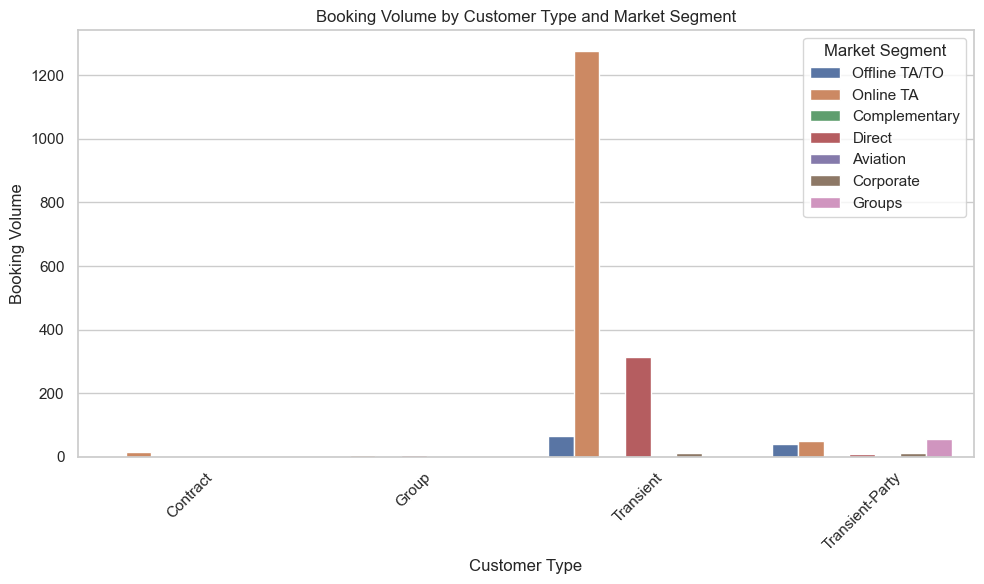

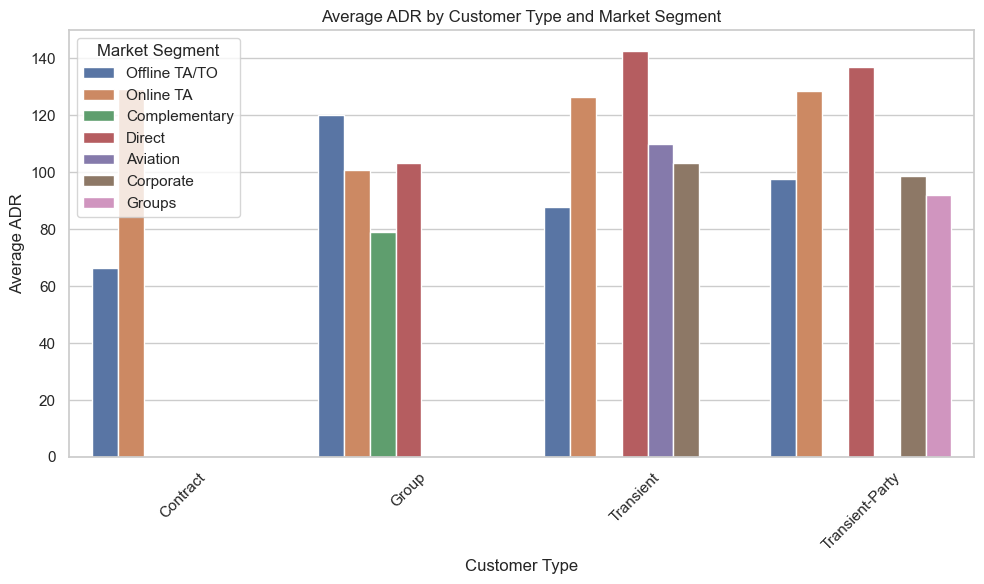

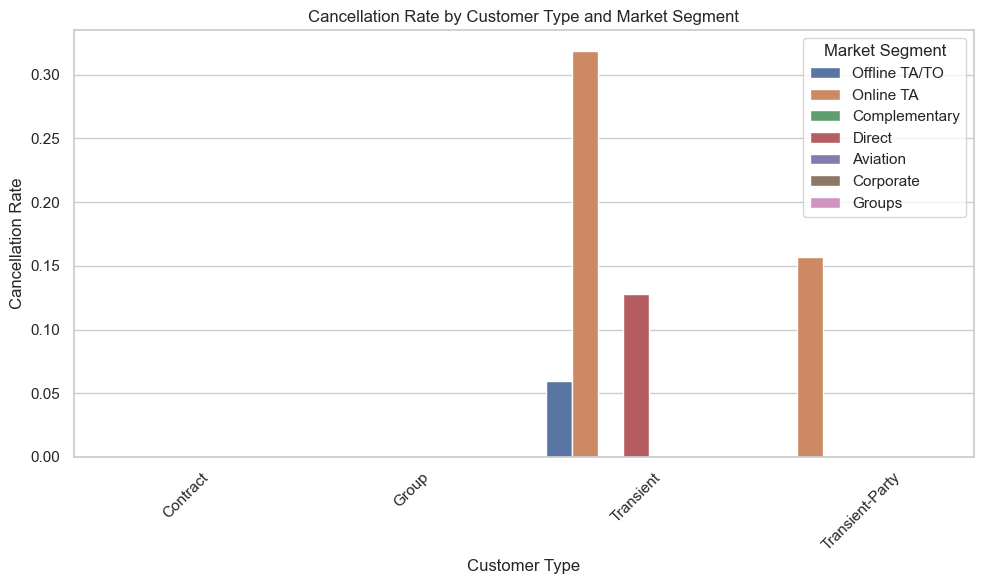

In [54]:
# Step 1: Group data to calculate booking volume, ADR, and cancellation rate
channel_effectiveness = df.groupby(['customer_type', 'market_segment']).agg(
    booking_volume=('is_canceled', 'size'),
    average_adr=('adr', 'mean'),
    cancellation_rate=('is_canceled', 'mean')
).reset_index()

# Step 2: Visualization

# Set style for plots
sns.set(style="whitegrid")

# Plot 1: Booking Volume by Customer Type and Market Segment
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_effectiveness, x='customer_type', y='booking_volume', hue='market_segment')
plt.title('Booking Volume by Customer Type and Market Segment')
plt.xlabel('Customer Type')
plt.ylabel('Booking Volume')
plt.xticks(rotation=45)
plt.legend(title='Market Segment')
plt.tight_layout()
plt.show()

# Plot 2: Average ADR by Customer Type and Market Segment
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_effectiveness, x='customer_type', y='average_adr', hue='market_segment')
plt.title('Average ADR by Customer Type and Market Segment')
plt.xlabel('Customer Type')
plt.ylabel('Average ADR')
plt.xticks(rotation=45)
plt.legend(title='Market Segment')
plt.tight_layout()
plt.show()

# Plot 3: Cancellation Rate by Customer Type and Market Segment
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_effectiveness, x='customer_type', y='cancellation_rate', hue='market_segment')
plt.title('Cancellation Rate by Customer Type and Market Segment')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.legend(title='Market Segment')
plt.tight_layout()
plt.show()

# Interpretation:
In this method to find the market channels to find the most effective for specific customer segment I used barplot 
to visualize the Booking Volume by Customer Type and Market Segment,verage ADR by Customer Type and Market Segment and 
Cancellation Rate by Customer Type and Market Segment. So finally Online TA is this highest in market segment.

# Another method to do the task-4(II):

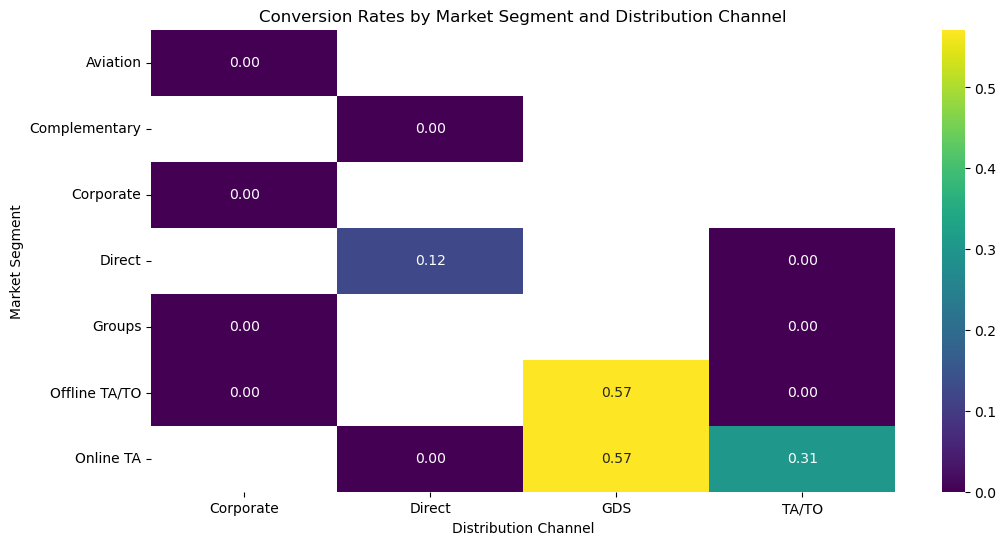

In [28]:
# Group data by market segment and distribution channel, calculate conversion rates
grouped_data = df.groupby(['market_segment', 'distribution_channel']).agg(
    conversion_rate=('is_canceled', 'mean')
).reset_index()

# Visualize conversion rates
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_data.pivot(index='market_segment', columns='distribution_channel', values='conversion_rate'),
            annot=True, fmt='.2f', cmap='viridis')
plt.title('Conversion Rates by Market Segment and Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Market Segment')
plt.show()

# Interpretation:
To find most effective reaching customers segments I used heatmap to find the correlation.Finally the heatmap shows that \
Online TA is the most effective reaching customers segments with highest correlation and positive.

# Task-4(III):How can marketing strategies customized to resonate with specific customer segments,considering
# factors such as previous cancellation,booking lead time and special request?

                       is_canceled                                          \
                             count      mean       std  min  25%  50%  75%   
customer_segment                                                             
High Request Customer        286.0  0.174825  0.380483  0.0  0.0  0.0  0.0   
Loyal Customer              1218.0  0.316913  0.465464  0.0  0.0  0.0  1.0   
Short Lead Time Booker       371.0  0.061995  0.241471  0.0  0.0  0.0  0.0   

                            lead_time             ...                 \
                        max     count       mean  ...     75%    max   
customer_segment                                  ...                  
High Request Customer   1.0     286.0  93.821678  ...  128.75  343.0   
Loyal Customer          1.0    1218.0  83.280788  ...  120.00  542.0   
Short Lead Time Booker  1.0     371.0   1.711590  ...    3.00    7.0   

                       total_of_special_requests                           \
                     

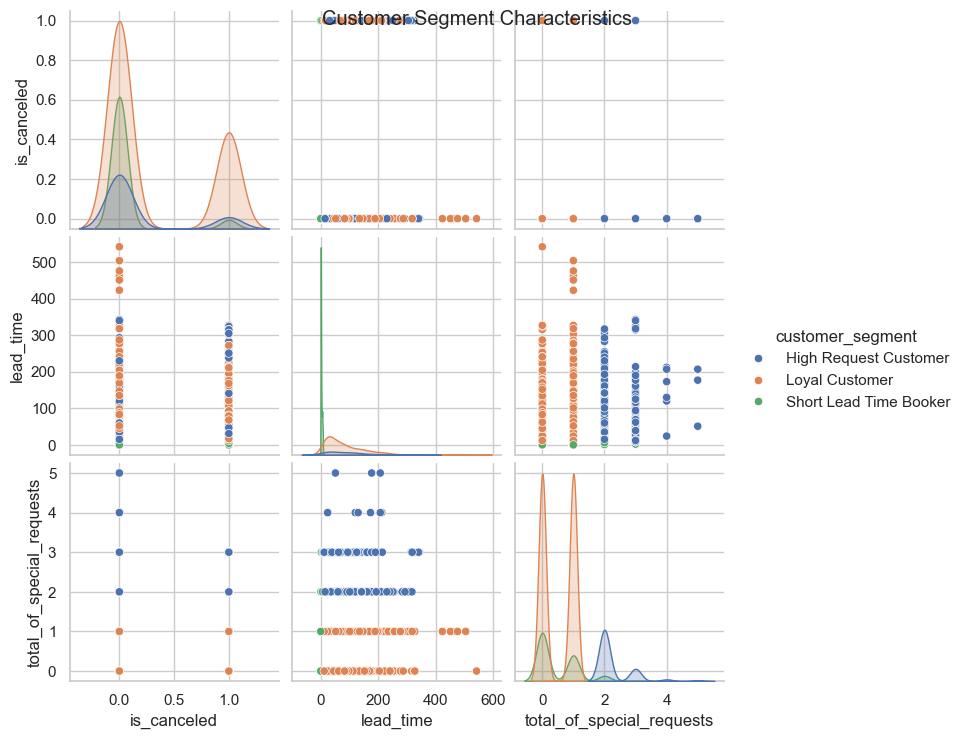

In [66]:
# Define customer segments based on cancellation behavior, lead time, and special requests
def segment_customers(row):
    if row['is_canceled'] >= 2:
        return 'Frequent Canceler'
    elif row['lead_time'] <= 7:
        return 'Short Lead Time Booker'
    elif row['total_of_special_requests'] >= 2:
        return 'High Request Customer'
    else:
        return 'Loyal Customer'

df['customer_segment'] = df.apply(segment_customers, axis=1)

# Group data by customer segment and calculate statistics
grouped_data = df.groupby('customer_segment')[['is_canceled', 'lead_time', 'total_of_special_requests']].describe()

# Print the grouped data
print(grouped_data)

# Create a Seaborn pairplot with the segments as hue
sns.pairplot(df, hue='customer_segment', vars=['is_canceled', 'lead_time', 'total_of_special_requests'])

# Add title
plt.suptitle('Customer Segment Characteristics')

# Show the plot
plt.show()

# Interpretation:
Using pair plot it visualize relationship between previous cancellation,booking lead time and special request. Additionally
customer segment characteristics 'is cancelled'(Loyal customer) is peak like leptokurtosis.
Lead time shows flatten like Negative kurtosis(platy kurtosis) because the tail is right skewness and it is flat.
In special request all the (high request customer,loyal customer,short lead time booker ) customers are rightly skewed.

# Task-5 Revenue Management:

# Task-5(I): How does the Average daily rate(ADR) vary over time?

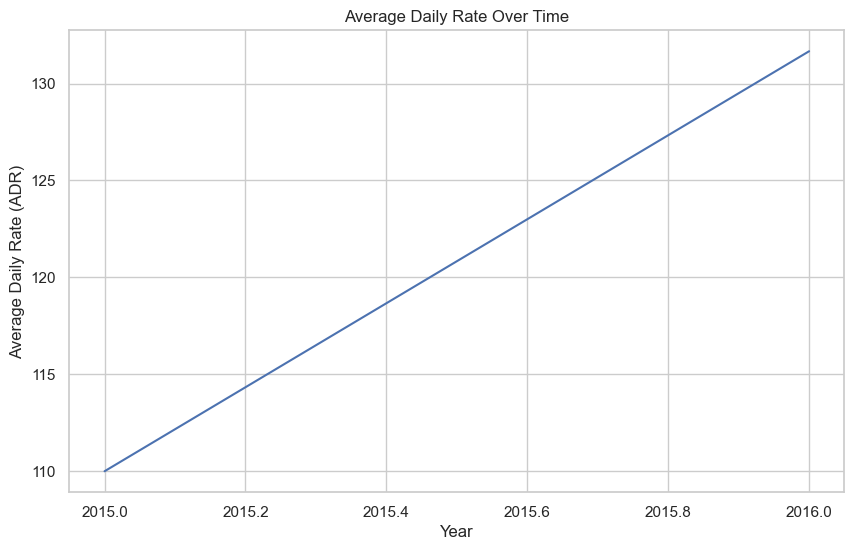

In [74]:
# Sample data (assuming you have a DataFrame 'df' with 'adr' and 'arrival_date_year' columns)
data = {'arrival_date_year': [2015, 2015, 2015, 2016, 2016, 2016],
        'adr': [100, 110, 120, 130, 125, 140]}
df = pd.DataFrame(data)

# Calculate average ADR per year
avg_adr_per_year = df.groupby('arrival_date_year')['adr'].mean()

# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(avg_adr_per_year.index, avg_adr_per_year.values)
plt.xlabel('Year')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Average Daily Rate Over Time')
plt.grid(True)
plt.show()

# Interpretation:
In the year of 2015 and 2016 it shows upward trend of average daily rate .

# Task-5(II):Can we identify pricing strategies that maximize revenue?

In [113]:
df['lead_time'].corr(df['adr'])

-0.0903234541920684

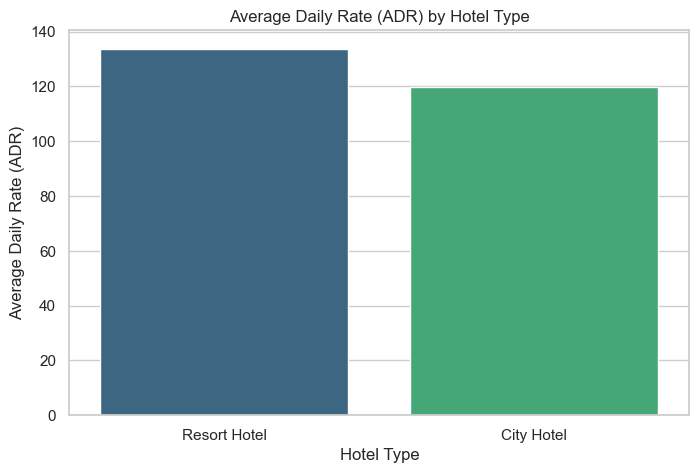

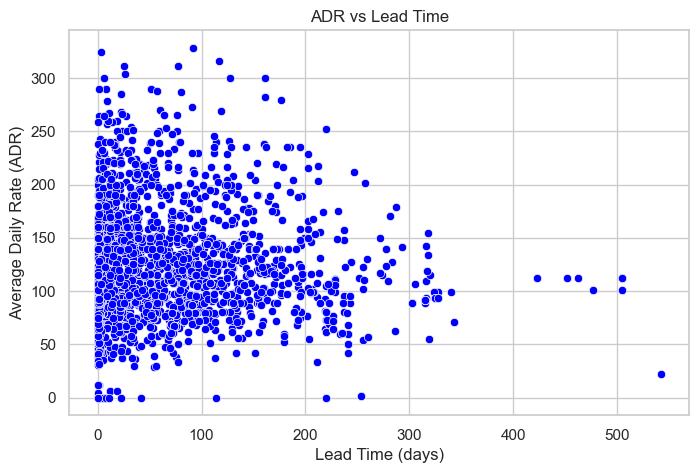

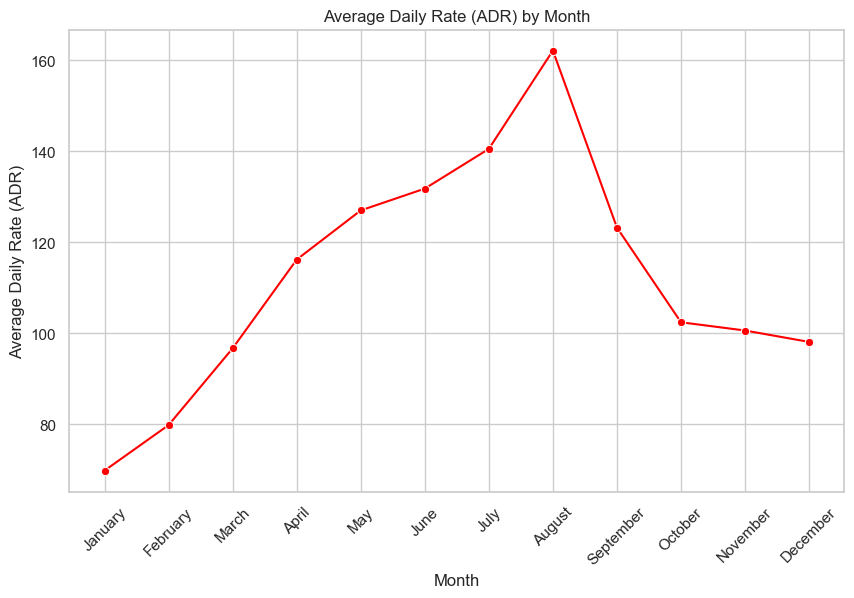

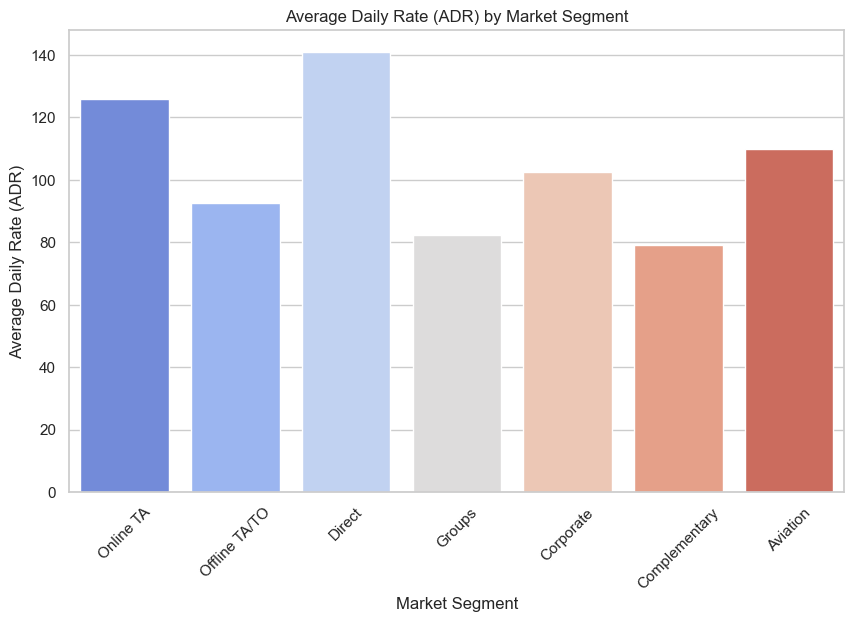

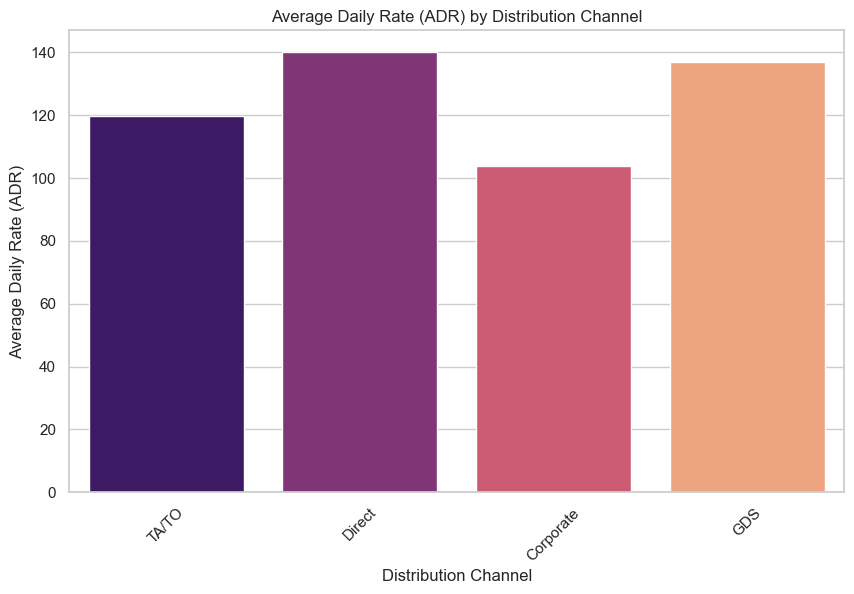

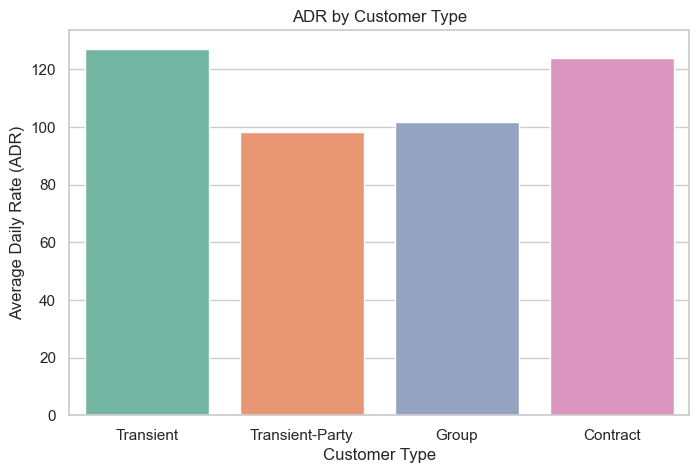

In [102]:
# Step 1: Analyze ADR by Hotel Type

plt.figure(figsize=(8, 5))
sns.barplot(x='hotel', y='adr', data=df, estimator='mean', ci=None, palette='viridis')
plt.title('Average Daily Rate (ADR) by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# Step 2: Analyze ADR vs Lead Time
plt.figure(figsize=(8, 5))
sns.scatterplot(x='lead_time', y='adr', data=df, color='blue')
plt.title('ADR vs Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# Step 3: Seasonality - ADR by Month
plt.figure(figsize=(10, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
monthly_adr = df.groupby('arrival_date_month')['adr'].mean()
sns.lineplot(x=monthly_adr.index, y=monthly_adr.values, marker='o', color='red')
plt.title('Average Daily Rate (ADR) by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()

# Step 4: Impact of Market Segment on ADR
plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment', y='adr', data=df, estimator='mean', ci=None, palette='coolwarm')
plt.title('Average Daily Rate (ADR) by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()

# Step 5: Impact of Distribution Channel on ADR
plt.figure(figsize=(10, 6))
sns.barplot(x='distribution_channel', y='adr', data=df, estimator='mean', ci=None, palette='magma')
plt.title('Average Daily Rate (ADR) by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()

# Step 6: Impact of Customer Type on ADR
plt.figure(figsize=(8, 5))
sns.barplot(x='customer_type', y='adr', data=df, estimator='mean', ci=None, palette='Set2')
plt.title('ADR by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# Interpretation:
To identify pricing strategies that maximise revenue I used different advanced chart for visualization
First chart is bar chart it will analyze ADR by hotel type so that Resort is highest in revenue,secondly scatterplot
to visualize Analyze ADR vs Lead Time and it shows negative relationship(-0.0903234541920684),Third one is lineplot it analyze Seasonality - ADR by Month
and visualization says that month of August is peak, and fourth will be barchart so it shows Impact of Market Segment on ADR,by visulization market
segment'Direct' is in peak,in fifth chart (barplot) it shows Impact of Distribution Channel on ADR,by visualization distribution channel 'Direct' is in peak,finally
 Impact of Customer Type on ADR,by visualization the customer type Transient is in peak.
# Final conclusion:
Based on the analysis, pricing strategies that maximize revenue can be identified
by focusing on high-revenue segments such as resorts,direct market segments, 
direct distribution channels, and transient customer types, particularly in peak periods like August.

# Task-5(III):Are there specific room type associated with higher ADR?

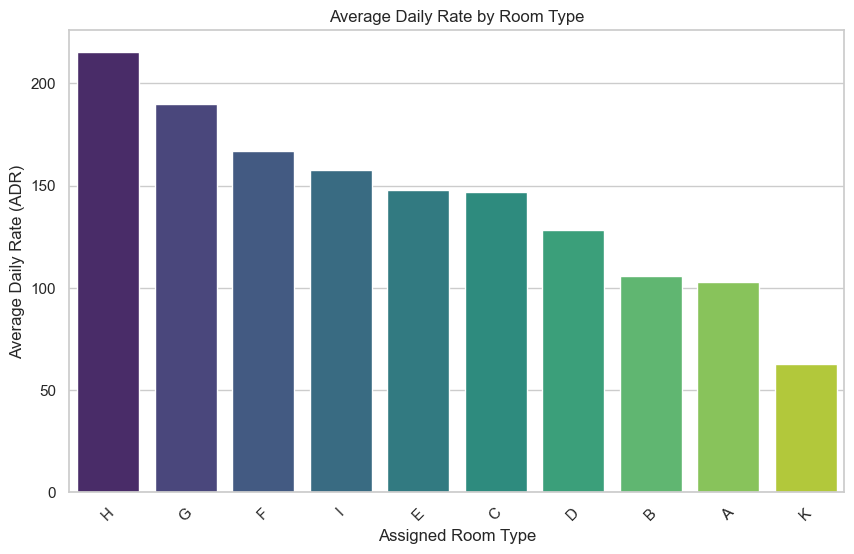

assigned_room_type
H    215.380000
G    190.114196
F    166.891329
I    157.834286
E    148.010113
C    146.905000
D    128.033448
B    105.685185
A    102.765482
K     62.771429
Name: adr, dtype: float64


In [118]:
# Group by 'assigned_room_type' and calculate the mean ADR
room_adr = df.groupby('assigned_room_type')['adr'].mean().sort_values(ascending=False)

# Plotting the results using a barplot
plt.figure(figsize=(10,6))
sns.barplot(x=room_adr.index, y=room_adr.values, palette='viridis')
plt.title('Average Daily Rate by Room Type')
plt.xlabel('Assigned Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()
print(room_adr)

# Interpretation:
In this task to find the specific room type associated with higher ADR I used bar plot and groupby.
So that I has identified that the room type "H" is in peak of Average daily rate.

# Task-6:Operational Efficiency:

# Task-6(I):What is the effectiveness of different booking distribution channels?

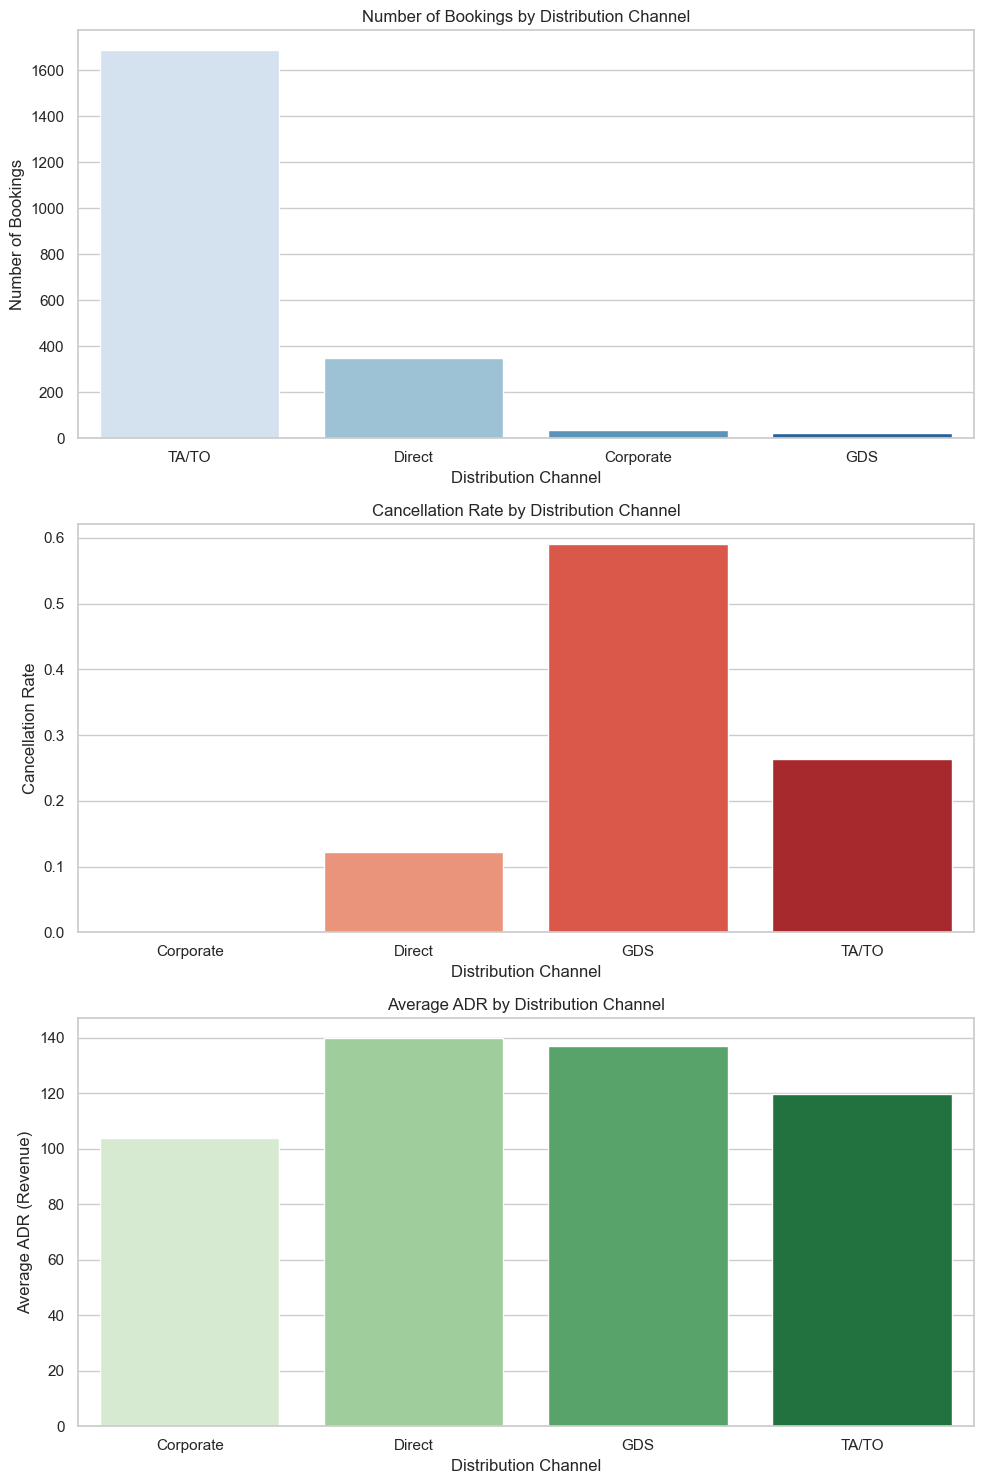

In [124]:
# 1. Number of bookings per distribution channel
bookings_by_channel = df['distribution_channel'].value_counts()

# 2. Cancellation rate per distribution channel
cancel_rate_by_channel = df.groupby('distribution_channel')['is_canceled'].mean()

# 3. Average ADR (revenue) per distribution channel
adr_by_channel = df.groupby('distribution_channel')['adr'].mean()

# Combine the results into one DataFrame for easier comparison
channel_effectiveness = pd.DataFrame({
    'Number of Bookings': bookings_by_channel,
    'Cancellation Rate': cancel_rate_by_channel,
    'Average ADR (Revenue)': adr_by_channel
})

# Display the result
channel_effectiveness

# Visualizing the effectiveness
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Barplot for number of bookings per channel
sns.barplot(x=bookings_by_channel.index, y=bookings_by_channel.values, ax=axes[0], palette='Blues')
axes[0].set_title('Number of Bookings by Distribution Channel')
axes[0].set_xlabel('Distribution Channel')
axes[0].set_ylabel('Number of Bookings')

# Barplot for cancellation rate per channel
sns.barplot(x=cancel_rate_by_channel.index, y=cancel_rate_by_channel.values, ax=axes[1], palette='Reds')
axes[1].set_title('Cancellation Rate by Distribution Channel')
axes[1].set_xlabel('Distribution Channel')
axes[1].set_ylabel('Cancellation Rate')

# Barplot for ADR per channel
sns.barplot(x=adr_by_channel.index, y=adr_by_channel.values, ax=axes[2], palette='Greens')
axes[2].set_title('Average ADR by Distribution Channel')
axes[2].set_xlabel('Distribution Channel')
axes[2].set_ylabel('Average ADR (Revenue)')

plt.tight_layout()
plt.show()

# Interpretation:
To find effectiveness of different booking distribution channels,first I used bar plot to find number of bookings per channel
so that TA/TO is in highest booking,secondly with bar plot to find cancellation rate per channel identified that GDS distribution channel
is highest in cancellation rate per channel and with final barplot to show ADR per channel identified that the distribution channel of
GDS for average daily rate(revenue) "Direct" is highest.

# Task-6(II):How do booking changes impact hotel operations?

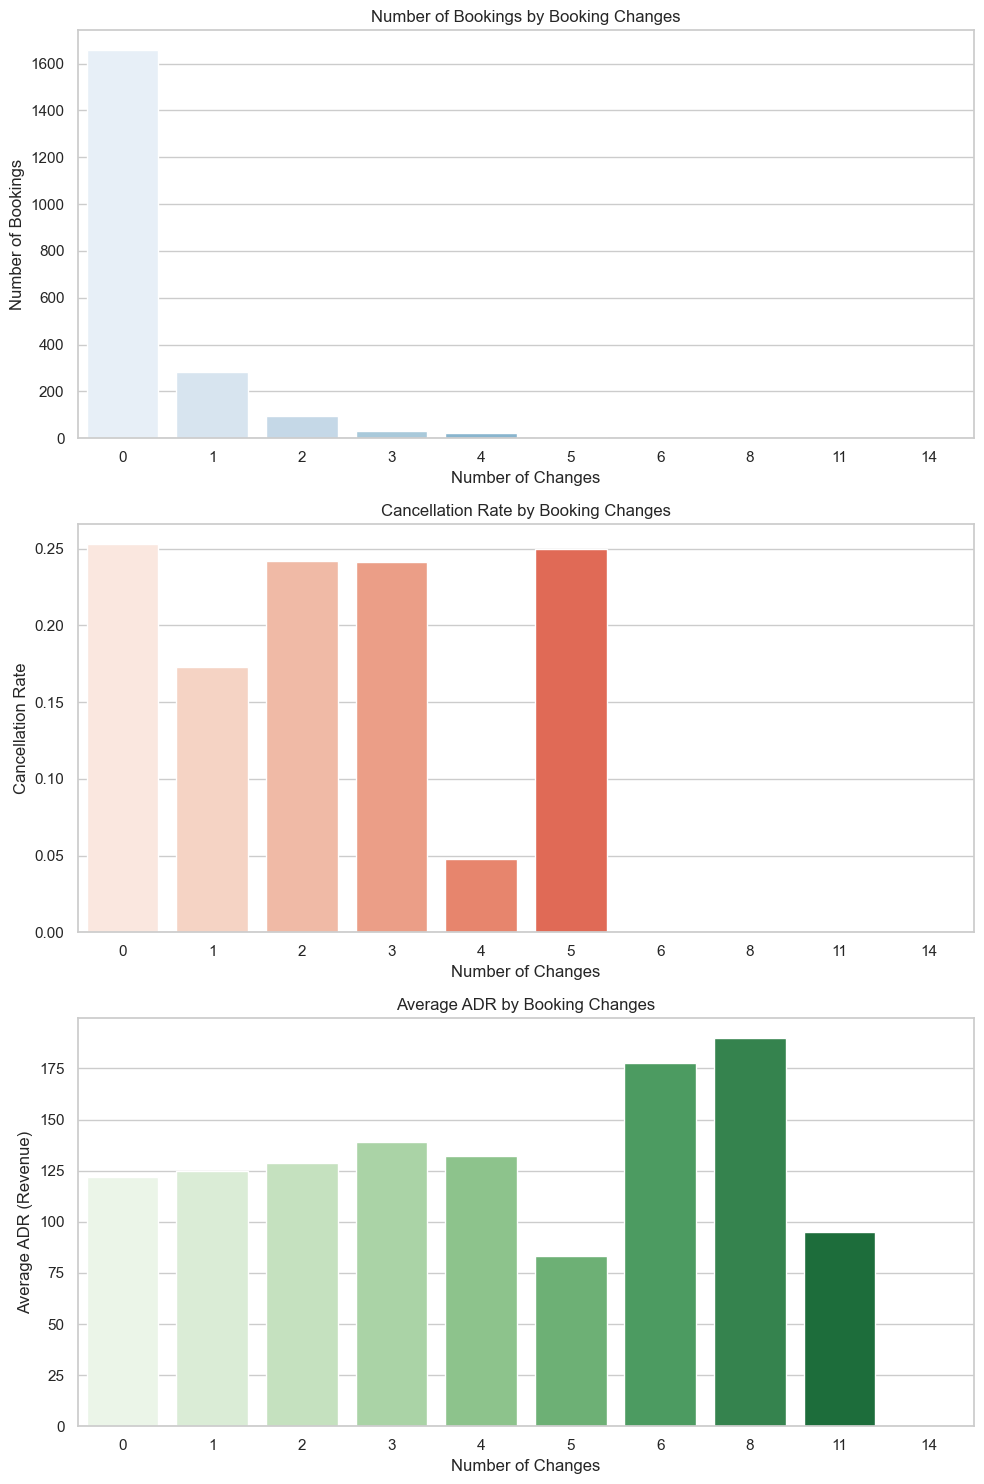

In [129]:
# 1. Analyze the distribution of booking changes
booking_change_distribution = df['booking_changes'].value_counts()

# 2. Check how booking changes relate to cancellation rates
cancel_rate_by_changes = df.groupby('booking_changes')['is_canceled'].mean()

# 3. Check how booking changes impact ADR (revenue)
adr_by_changes = df.groupby('booking_changes')['adr'].mean()

# Combine the analysis into a DataFrame for comparison
booking_change_impact = pd.DataFrame({
    'Number of Bookings': booking_change_distribution,
    'Cancellation Rate': cancel_rate_by_changes,
    'Average ADR (Revenue)': adr_by_changes
})

# Display the result
booking_change_impact

# Visualizing the impact of booking changes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Barplot for number of bookings with changes
sns.barplot(x=booking_change_distribution.index, y=booking_change_distribution.values, ax=axes[0], palette='Blues')
axes[0].set_title('Number of Bookings by Booking Changes')
axes[0].set_xlabel('Number of Changes')
axes[0].set_ylabel('Number of Bookings')

# Barplot for cancellation rate based on booking changes
sns.barplot(x=cancel_rate_by_changes.index, y=cancel_rate_by_changes.values, ax=axes[1], palette='Reds')
axes[1].set_title('Cancellation Rate by Booking Changes')
axes[1].set_xlabel('Number of Changes')
axes[1].set_ylabel('Cancellation Rate')

# Barplot for ADR by booking changes
sns.barplot(x=adr_by_changes.index, y=adr_by_changes.values, ax=axes[2], palette='Greens')
axes[2].set_title('Average ADR by Booking Changes')
axes[2].set_xlabel('Number of Changes')
axes[2].set_ylabel('Average ADR (Revenue)')

plt.tight_layout()
plt.show()

# Interpretation:
Most booking have no changes(0),Bookings with more changes show a higher likelihood of cancellation,
indicating instability in plans and finally with ADR by booking changes ,when number of booking changes is increase ADR is decrese.So it leads
to revenue loss if this cause frequently.

# Task-6(III):Is there a correlation between duration of booking remains on the waiting list and likelihood of cancellation?

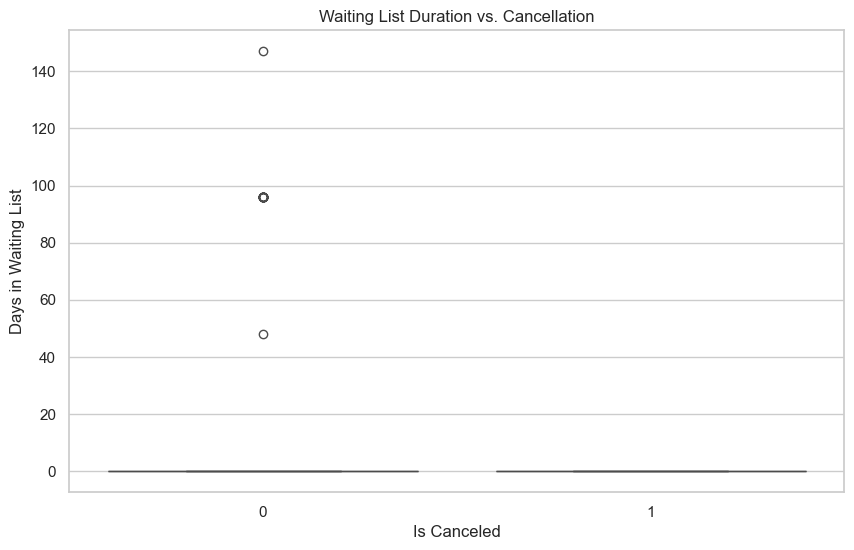

-0.06089201752421644

In [132]:
# Step 1: Calculate the duration on the waiting list
# Assuming 'days_in_waiting_list' column exists, we'll check if it affects cancellation.
waiting_list_duration = df['days_in_waiting_list']

# Step 2: Correlation between waiting list duration and cancellation
correlation = df[['days_in_waiting_list', 'is_canceled']].corr().iloc[0, 1]

# Step 3: Visualize the relationship between waiting list duration and cancellation
plt.figure(figsize=(10,6))
sns.boxplot(x='is_canceled', y='days_in_waiting_list', data=df)
plt.title('Waiting List Duration vs. Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('Days in Waiting List')
plt.show()

# Output the correlation value
correlation

# Interpretation:
To find the correlation between duration of booking remains on the waiting list and likelihood of cancellation it shows 
high negative correlation(-0.06089201752421644).

# Task-7:Loyalty programs and repeate business:

# Task-7(I):What is the behaviour of repeated guests with respect to their nature of stay?

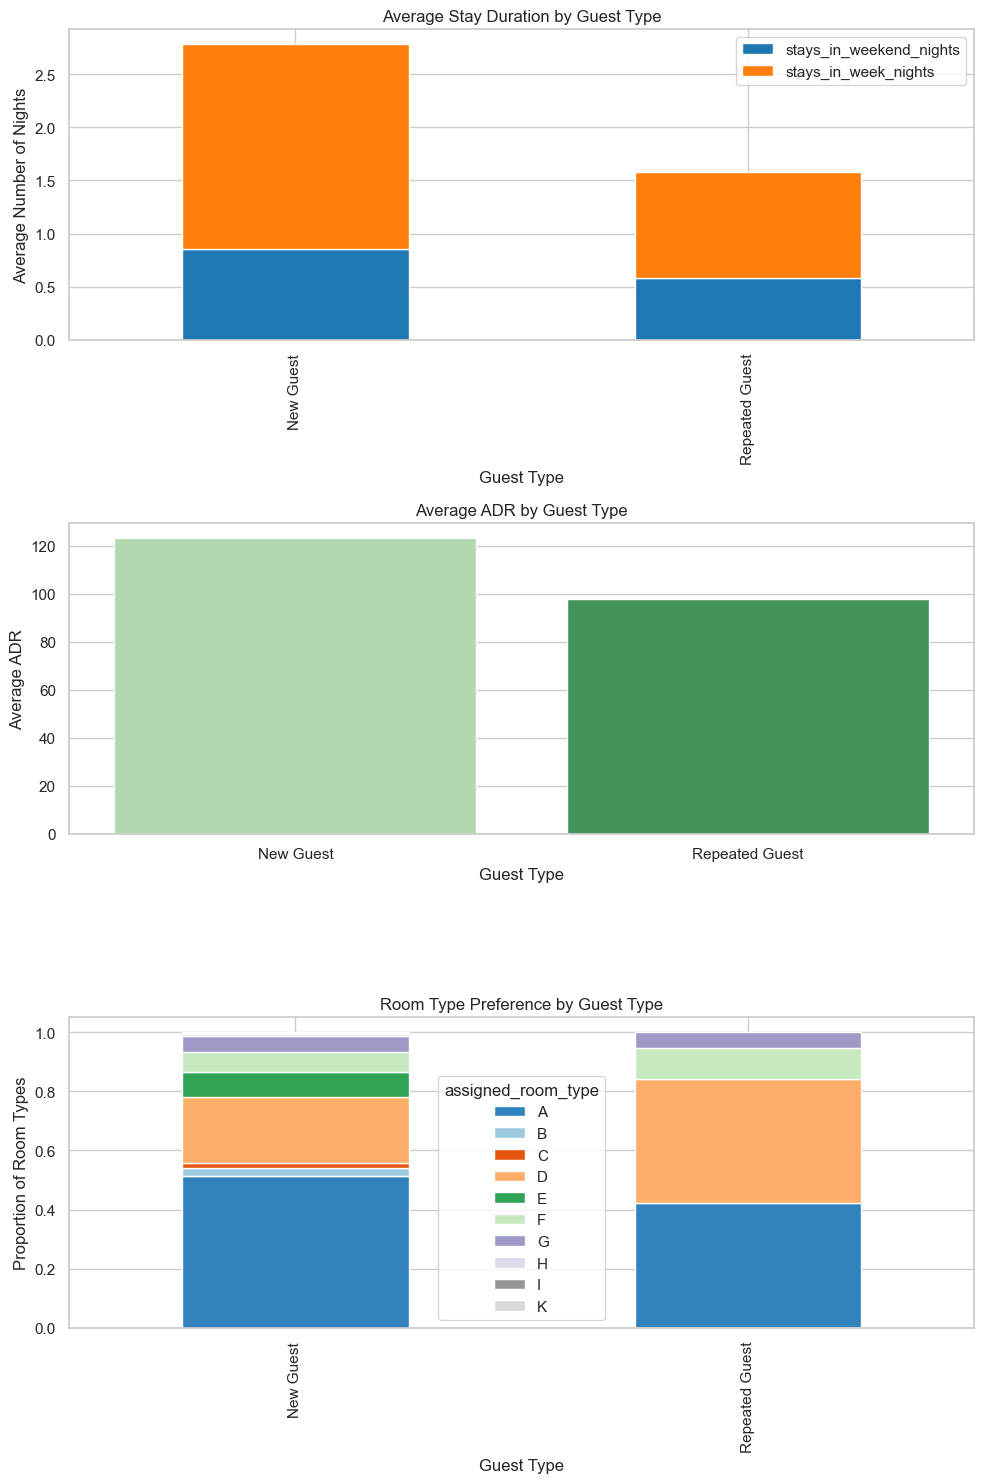

In [153]:
# Step 1: Create a new column to categorize guests as repeated or not
df['is_repeated_guest'] = df['is_repeated_guest'].apply(lambda x: 'Repeated Guest' if x == 1 else 'New Guest')

# Step 2: Calculate average stay duration for repeated and non-repeated guests
stay_duration = df.groupby('is_repeated_guest')[['stays_in_weekend_nights', 'stays_in_week_nights']].mean()

# Step 3: Calculate the average ADR for repeated and non-repeated guests
adr_by_guest_type = df.groupby('is_repeated_guest')['adr'].mean()

# Step 4: Analyze room type preference by guest type
room_preference = df.groupby('is_repeated_guest')['assigned_room_type'].value_counts(normalize=True)

# Combine the results into a DataFrame
guest_behavior = pd.DataFrame({
    'Average Weekend Nights': stay_duration['stays_in_weekend_nights'],
    'Average Week Nights': stay_duration['stays_in_week_nights'],
    'Average ADR': adr_by_guest_type
})

# Display the results
guest_behavior

# Visualize the behavior differences
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Barplot for stay duration
stay_duration.plot(kind='bar', stacked=True, ax=axes[0], color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Average Stay Duration by Guest Type')
axes[0].set_xlabel('Guest Type')
axes[0].set_ylabel('Average Number of Nights')

# Barplot for ADR by guest type
sns.barplot(x=adr_by_guest_type.index, y=adr_by_guest_type.values, ax=axes[1], palette='Greens')
axes[1].set_title('Average ADR by Guest Type')
axes[1].set_xlabel('Guest Type')
axes[1].set_ylabel('Average ADR')

# Stacked barplot for room type preference
room_preference.unstack().plot(kind='bar', stacked=True, ax=axes[2], colormap='tab20c')
axes[2].set_title('Room Type Preference by Guest Type')
axes[2].set_xlabel('Guest Type')
axes[2].set_ylabel('Proportion of Room Types')

plt.tight_layout()
plt.show()

# Interpretation:
Stay duration show that repeated guests tend to have longer stays compared to new guests.
ADR shows repeated guests might enjoy a slightly lower ADR,possibly due to loyalty discounts or negotiated rates.
Room type preferences shows repeated guests show a preference for specific room types, which can indicate loyalty or comfort with certain accommodations.

# Task-7(II):How does the success of loyalty programs relate to the accomodation of special requests from customers?

In [160]:
# Step 1: Convert each series to a DataFrame and reset indices to align them
special_requests_df = special_requests_by_guest_type.reset_index(name='Avg Special Requests')
cancel_rate_df = cancel_rate_by_requests.reset_index(name='Cancellation Rate')
adr_requests_df = adr_by_requests.reset_index(name='ADR for Repeated Guests')

# Combine into one DataFrame using outer join to align all indices
special_request_analysis = pd.concat([special_requests_df, cancel_rate_df, adr_requests_df], axis=1)

# Display the combined DataFrame
special_request_analysis

,guest_type,Avg Special Requests,total_of_special_requests,Cancellation Rate,total_of_special_requests,ADR for Repeated Guests
0,New Guest,0.764902,0,0.318919,NaN,NaN
1,NaN,NaN,1,0.178832,NaN,NaN
2,NaN,NaN,2,0.170213,NaN,NaN
3,NaN,NaN,3,0.192982,NaN,NaN
4,NaN,NaN,4,0.000000,NaN,NaN
5,NaN,NaN,5,0.000000,NaN,NaN


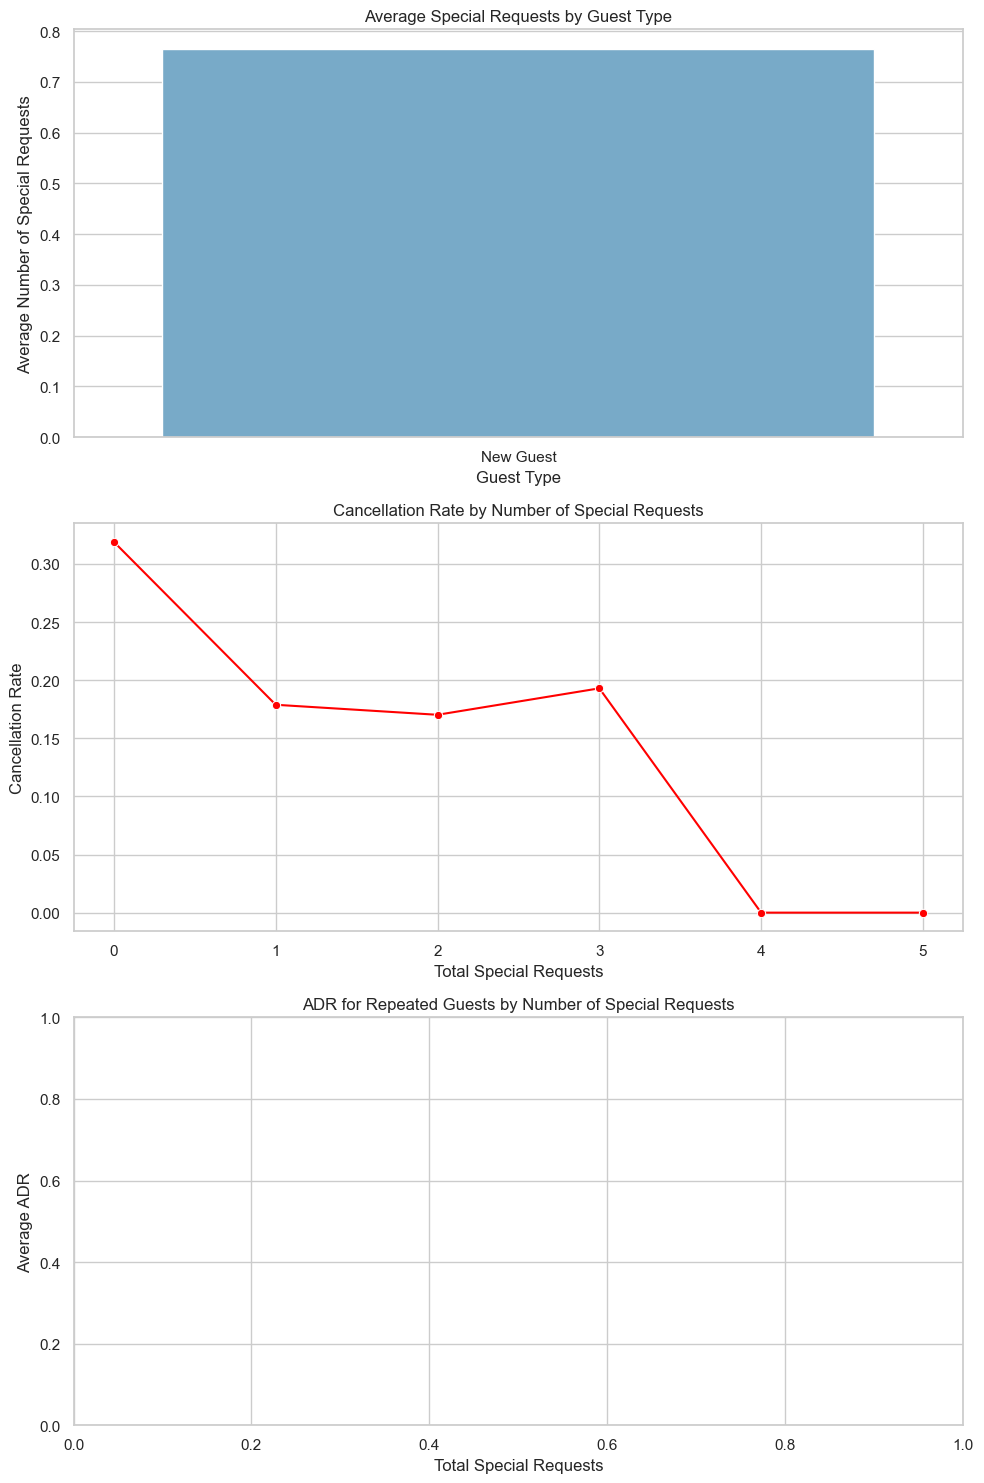

In [162]:
# Step 5: Visualize the impact of special requests
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Barplot for average special requests by guest type
sns.barplot(x=special_requests_by_guest_type.index, y=special_requests_by_guest_type.values, ax=axes[0], palette='Blues')
axes[0].set_title('Average Special Requests by Guest Type')
axes[0].set_xlabel('Guest Type')
axes[0].set_ylabel('Average Number of Special Requests')

# Lineplot for cancellation rate by number of special requests
sns.lineplot(x=cancel_rate_by_requests.index, y=cancel_rate_by_requests.values, ax=axes[1], marker='o', color='red')
axes[1].set_title('Cancellation Rate by Number of Special Requests')
axes[1].set_xlabel('Total Special Requests')
axes[1].set_ylabel('Cancellation Rate')

# Barplot for ADR based on special requests for repeated guests
sns.barplot(x=adr_by_requests.index, y=adr_by_requests.values, ax=axes[2], palette='Greens')
axes[2].set_title('ADR for Repeated Guests by Number of Special Requests')
axes[2].set_xlabel('Total Special Requests')
axes[2].set_ylabel('Average ADR')

plt.tight_layout()
plt.show()

# Interpretation:
Higher average special requests correlate with increased cancellation rates, 
while ADR for repeated guests shows no significant variation with special requests.Additionally using lineplot I has identified that
in special requests of "0" is in peak of cancellation rate with above "0.30",finally using barplot is used to show
for ADR based on special requests for repeated guests.

# Task-7(III):What factors contribute to repeat business?What is the distribution of leadtime for repeated and non-repeated guests?

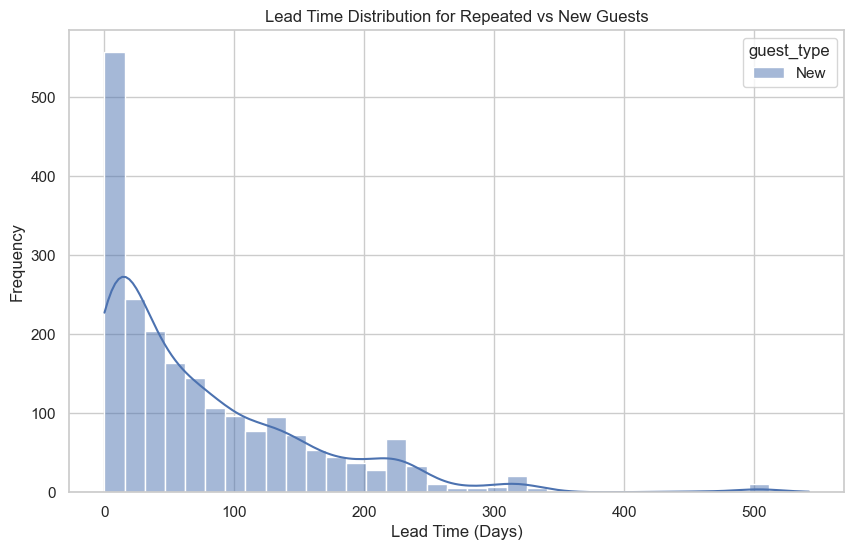

In [177]:
# Task 1: Factors contributing to repeat business
# Analyze the impact of booking channel, ADR, and cancellation history on repeat business

# Group by guest type and calculate the average ADR, number of cancellations, and booking channels
repeat_factors = df.groupby('is_repeated_guest').agg({
    'adr': 'mean',
    'previous_cancellations': 'mean',
    'distribution_channel': lambda x: x.value_counts().index[0]  # Most common distribution channel
})

repeat_factors.columns = ['Avg ADR', 'Avg Previous Cancellations', 'Most Common Channel']
repeat_factors.index = ['New Guest', 'Repeated Guest']

# Display the factors contributing to repeat business
repeat_factors

# Task 2: Distribution of lead time for repeated vs non-repeated guests

# Create a column to label guests as 'Repeated' or 'New'
df['guest_type'] = df['is_repeated_guest'].apply(lambda x: 'Repeated' if x == 1 else 'New')

# Plot the lead time distribution for repeated and non-repeated guests
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lead_time', hue='guest_type', multiple='stack', kde=True)
plt.title('Lead Time Distribution for Repeated vs New Guests')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()

# Interpretation:
First I analyzed the impact of booking channel, ADR, and cancellation history on repeat business,so I used groupby to find it,and then
using histplot I identified the lead time distribution for repeated and non-repeated guests,so it shows peak in "0" days of lead time.


# Final conclusion for task-7(III):
Factors contributing to repeat business:

Repeated guests may have a lower average ADR, indicating price sensitivity, 
or they may prefer specific booking channels (e.g., direct or online travel agents).
Previous cancellations could be a negative indicator of repeat business, suggesting that guests with cancellations are less likely to return.
Lead time distribution:

The histogram will show whether repeated guests tend to book further in advance or 
at the last minute compared to new guests, helping to identify booking patterns.